In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

In [2]:
vans = pd.read_csv('clean_data_v3.csv')

In [3]:
vans = vans.drop(columns=['Unnamed: 0'])
vans.head()

,Vehicle,Price,Location,Manufacturing Year,Make & Model,Mileage,Drive,Title Status,Transmission,Fuel,...,Tow Winch,Oven,Propane,Skylight,Bike Rack,Child Seat,Microwave,TV,Shower,Fuel (Code)
0,2019 Silver 350 Transit DW HD High Roof Ecoboo...,84000.0,"Panama City Beach, Florida, United States",2019,350 Transit Van DW HD,28084.0,2WD,Clean,Automatic,Gasoline,...,0,0,0,0,0,0,0,0,1,2
1,One of a Kind Ford Transit 350 AWD. Boat inspi...,190000.0,"San Diego, California, United States",2021,Ford Transit 2021 AWD,3500.0,AWD,Clean,Automatic,Gasoline,...,0,0,0,0,0,0,0,0,1,2
2,2021 Sprinter,99800.0,"Portland, Oregon, United States",2021,Sprinter,3000.0,2WD,Clean,Automatic,Diesel,...,0,0,0,0,0,0,0,0,1,1
3,2016 Sprinter 170,72000.0,"10 Via Vecino, Santa Fe, New Mexico 87506, Uni...",2016,Mercedes Sprinter Van 170,46000.0,2WD,Clean,Automatic,Diesel,...,0,0,0,0,0,0,0,0,1,1
4,4x4 144 Mercedes sprinter,154000.0,"Grass Valley, California, United States",2019,Mercedes sprinter 144 4x4,10000.0,4WD,Clean,Automatic,Diesel,...,1,0,0,0,0,0,0,0,1,1


In [4]:
x_test = np.array(vans['Mileage']).reshape(-1,1)
y_test = np.array(vans['Price'])

In [5]:
mvp_model = LinearRegression().fit(x_test, y_test)

In [6]:
r_sq = mvp_model.score(x_test, y_test)

print(f'coefficient of determination: {r_sq}')
print(f'slope: {mvp_model.coef_}')
print(f'intercept: {mvp_model.intercept_}')

coefficient of determination: 0.2909488597948503
slope: [-0.38458417]
intercept: 105695.39681470729


In [7]:
x_test2 = np.array(vans['Mileage'])

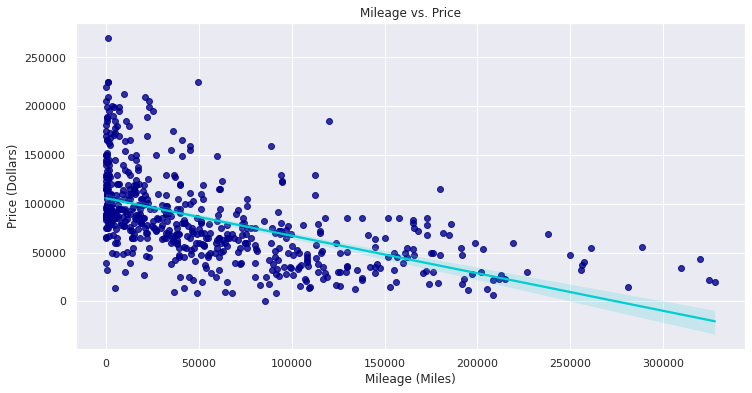

In [29]:
sns.regplot(x=x_test
            , y=y_test, scatter_kws={'color':'darkblue'}, line_kws={'color':'darkturquoise'})
sns.set(style='darkgrid',rc={"figure.figsize":(12, 6)})
plt.title('Mileage vs. Price')
plt.xlabel('Mileage (Miles)')
plt.ylabel('Price (Dollars)')

#plt.savefig('modelyear_v_price_regression')
plt.show()

In [9]:
x_test2 = sm.add_constant(x_test2)

In [10]:
mvp_model2 = sm.OLS(y_test, x_test2)
results = mvp_model2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     242.5
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.54e-46
Time:                        09:27:17   Log-Likelihood:                -7094.4
No. Observations:                 593   AIC:                         1.419e+04
Df Residuals:                     591   BIC:                         1.420e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.057e+05   2118.956     49.881      0.0

In [11]:
mileage_influence = results.get_influence()

In [12]:
mileage_influence_frame = mileage_influence.summary_frame().reset_index()

<AxesSubplot:ylabel='cooks_d'>

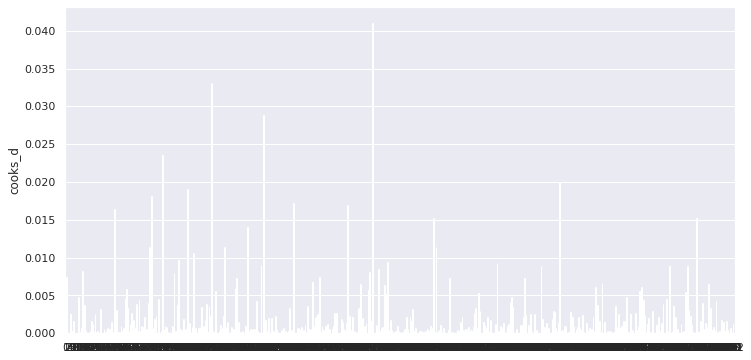

In [13]:
sns.barplot(y='cooks_d', x=mileage_influence_frame.index, data=mileage_influence_frame)

In [14]:
multi_x_test1 = vans[['Mileage','Fuel Efficiency (Highway)']]
#multi_x_test1 = multi_x_test1.reshape(-1,1)
y_test = y_test.reshape(-1,1)

mvp_multi = LinearRegression().fit(y_test, multi_x_test1)

In [15]:
multi_x_test1.shape

(593, 2)

In [16]:
y_test.shape

(593, 1)

In [17]:
#r_sq_multi = mvp_multi.score(multi_x_test1, y_test)

#print(f'coefficient of determination: {r_sq_multi}')
#print(f'slope: {mvp_multi.coef_}')
#print(f'intercept: {mvp_multi.intercept_}')

In [18]:
#sns.regplot(x=multi_x_test1, y=y_test, scatter_kws={'color':'darkblue'}, line_kws={'color':'darkturquoise'})
#sns.set(style='darkgrid',rc={"figure.figsize":(14, 10)})
#plt.title('Mileage & MPG vs. Price')
#plt.xlabel('Mileage (Miles) and Fuel Economy')
#plt.ylabel('Price (Dollars)')

#plt.show()

In [19]:
multi_x_test2 = sm.add_constant(multi_x_test1)

In [20]:
mvp_multi2 = sm.OLS(y_test, multi_x_test2)
results2 = mvp_multi2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     124.9
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           5.77e-46
Time:                        09:27:22   Log-Likelihood:                -7091.6
No. Observations:                 593   AIC:                         1.419e+04
Df Residuals:                     590   BIC:                         1.420e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [21]:
#vans.info()

In [22]:
multi_x_test3 = vans[['Mileage','Manufacturing Year','Sleeping Capacity']].to_numpy()
multi_x_test3 = sm.add_constant(multi_x_test3)
mvp_multi3 = sm.OLS(y_test, multi_x_test3)


results3 = mvp_multi3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     120.5
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           7.65e-61
Time:                        09:27:22   Log-Likelihood:                -7054.4
No. Observations:                 593   AIC:                         1.412e+04
Df Residuals:                     589   BIC:                         1.413e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.097e+06   4.82e+05     -8.494      0.0

In [23]:
#vans['Predict']=mvp_multi3.predict(multi_x_test3)
#vans['Resid']=vans['Price']-vans['Predict']
#with sns.axes_style('white'):
#    plot=vans.plot(kind='scatter',
#                  x='Predict',y='Resid',alpha=0.2,figsize=(10,6))

In [24]:
pairplot_test = vans[['Mileage','Fuel Efficiency (Highway)','Manufacturing Year','Sleeping Capacity','Price','Fuel (Code)',
                     'Shower','Toilet','Solar']]

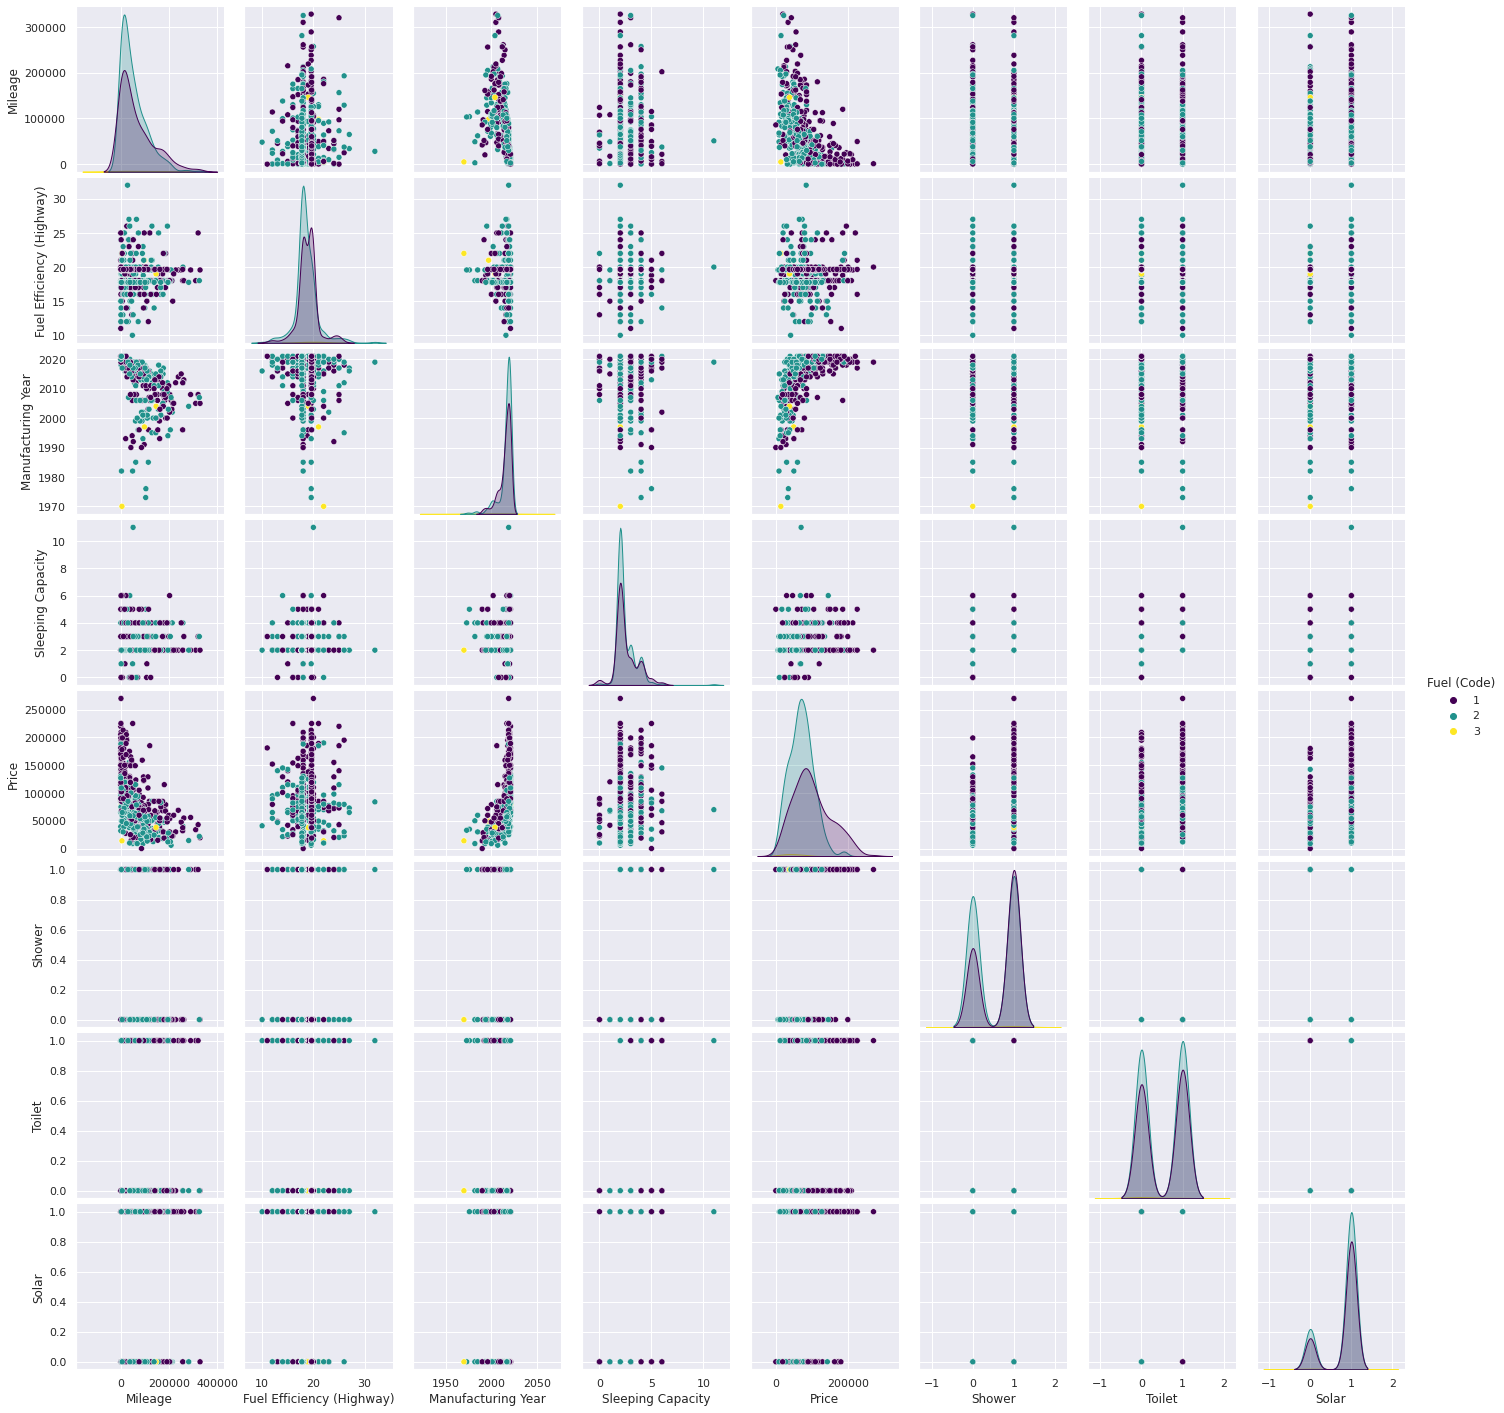

In [25]:
sns.pairplot(data=pairplot_test, hue='Fuel (Code)', palette='viridis', kind='scatter')

plt.savefig('vans_8x8_pairplot')

~~Why can't I use boolean columns in a pair plot?~~

*changed to 0's and 1's*

In [26]:
booleans_test = vans[['Mileage','Fuel Efficiency (Highway)','Manufacturing Year','Sleeping Capacity','Price',
                      'Shower','Awning','Solar','Fresh Water Tank (Built-in)','Toilet']].to_numpy()
booleans_test = sm.add_constant(booleans_test)
mvp_multi4 = sm.OLS(y_test, booleans_test)

results4 = mvp_multi4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.505e+29
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:28:35   Log-Likelihood:                 11903.
No. Observations:                 593   AIC:                        -2.378e+04
Df Residuals:                     582   BIC:                        -2.374e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.969e-09   6.99e-09      0.424      0.6

In [27]:
variables = results4.model.exog

vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

In [28]:
vif

[132417.21526134302,
 1.7203829943832623,
 1.027099864113125,
 1.8484179996824281,
 1.0680493876546024,
 2.211880798229052,
 1.6773386883487669,
 1.175697090783456,
 1.3931901786232592,
 1.647183795678684,
 1.372508967583965]

## Next Steps

- [x] 80/20 split of data (see regression_v2 notebook)
- [ ] Feature transformation (numeric features)
  - [ ] What features actually matter?
  - [ ] Improving normality of residuals (JB/Omnibus/Skew+Kurtosis)
- [x]  Take care of duplicates if I add in the new data